# Creating a Co-Vid19 heatmap

In [73]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import statsmodels.api as sm
import matplotlib.pylab as plt
from matplotlib import colors
import folium
from folium import plugins
import seaborn as sns
%matplotlib inline

In [11]:
covidColors = [
    '#3db7e4', # blue
    '#ccd663', # yellow-green
    '#262626', # black-ish
    '#e85f35', # orange
    '#7bc74c', # green
]

In [12]:
# first off, watermelon oreos are the best flavor no matter what the statistics say
dailyFile = "csse_covid_19_daily_reports/03-28-2020.csv"

dfCOVID = pd.read_csv(dailyFile)

dfCOVID.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-28 23:05:37,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-28 23:05:37,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-28 23:05:37,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-28 23:05:37,43.452658,-116.241552,76,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-28 23:05:37,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [34]:
def CreateDataFrameBy(param1, param2):
    dfINDX = dfCOVID.groupby(param1)[param2].count()
    dfINDX = dfINDX.to_frame()
    dfINDX.reset_index(inplace=True)
    return dfINDX

In [40]:
dfDEATH = CreateDataFrameBy("Country_Region", "Deaths")
dfDEATH.head()

,Country_Region,Deaths
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Angola,1


In [63]:
dfDEATH.max()

int(dfDEATH.max()["Deaths"])

3178

In [54]:
dfDEATH.min()

Country_Region    Afghanistan
Deaths                      1
dtype: object

In [38]:
dfRECOV = CreateDataFrameBy("Country_Region", "Recovered")
dfRECOV.head()

,Country_Region,Recovered
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Angola,1


In [42]:
dfACTIV = CreateDataFrameBy("Country_Region", "Active")
dfACTIV.head()

,Country_Region,Active
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Angola,1


In [78]:
def PlotCurrentCOVID(dataframe, strx, stry):
    cash60.sort()
    
    covidMIN = dataframe.min()
    covidMAX = dataframe.max()
    
    c60min = int(cash60[0])
    c60max = int(cash60[-1])
    
    binwidth = 250

    colors = ["seagreen", "gold", "coral"]
        
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.hist(cash20, density=True, color=colors[0], edgecolor="white", bins=range(c20min, c20max+binwidth, binwidth), label="20 Turns", alpha=0.50)
    ax.hist(cash40, density=True, color=colors[1], edgecolor="white", bins=range(c40min, c40max+binwidth, binwidth), label="40 Turns", alpha=0.50)
    ax.hist(cash60, density=True, color=colors[2], edgecolor="white", bins=range(c60min, c60max+binwidth, binwidth), label="60 Turns", alpha=0.50)
        
    ax.set_title("Prob Density of Final Player Cash", fontsize=20)
    ax.set_xlabel("Final Player Cash", fontsize=16)
    ax.set_ylabel("Probability Density", fontsize=16)
    ax.grid(True, alpha=0.25)
    ax.legend()
    


NameError: name 'fracs' is not defined

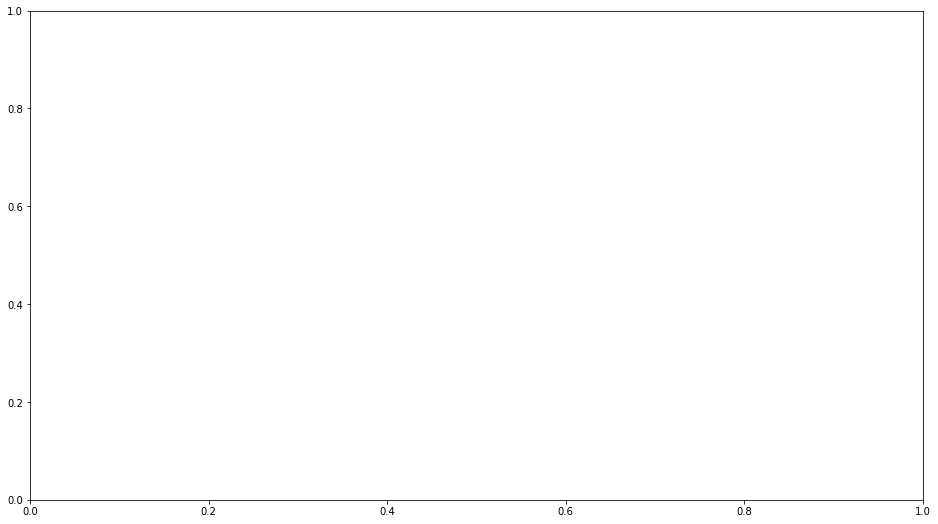

In [79]:
PlotCurrentCOVID(dfDEATH, "Country_Region", "Deaths")